Num samples class_0 2220
Num samples class_1 2250
Images (4470, 28, 28)
Labels (4470,)
Shape (4470, 784)
Elapsed time 0.007735490798950195
2.17.0
Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 784)]             0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 785       
Total params: 785
Trainable params: 785
Non-trainable params: 0
_________________________________________________________________
You must install pydot (`pip install pydot`) for `plot_model` to work.
Epoch 1/10
140/140 [==============================] - 0s 531us/step - loss: 6.0005e-08 - acc: 0.4966
Epoch 2/10
140/140 [==============================] - 0s 508us/step - loss: 6.0005e-08 - acc: 0.4966
Epoch 3/10
140/140 [==============================] - 0s 515us/step - loss: 6.0005e-08 - acc: 0.4966
Ep

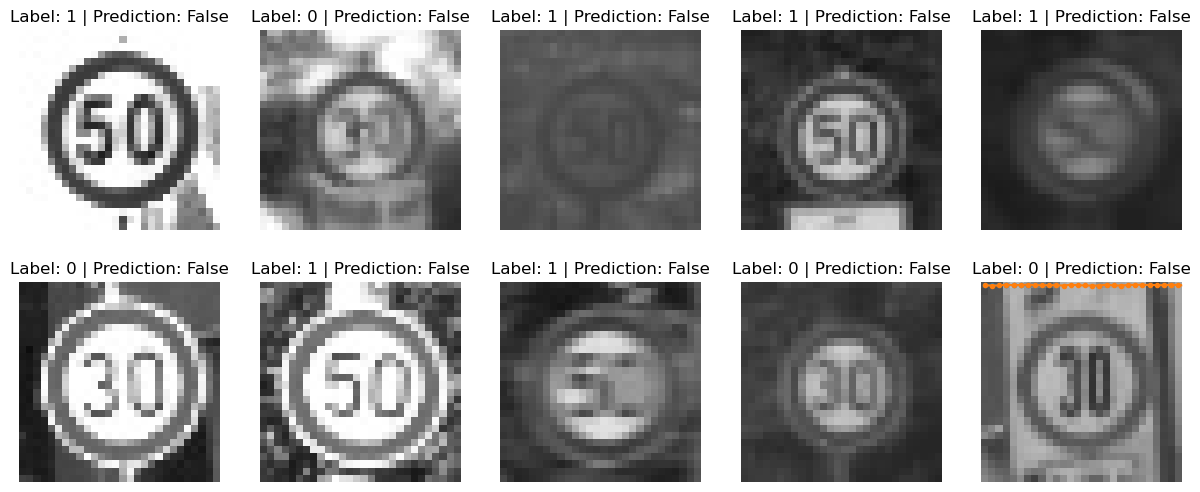

In [14]:
import os
import cv2
from time import time
import numpy as np
from sklearn.utils import shuffle
# from google.colab import drive

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 6]


folder = '/home/hask/Project/cv_homework/lesson12/data'
# Load traffic sign class 0
fnames_0 = os.listdir(os.path.join(folder, 'class_id_0'))
images_0 = [cv2.imread(os.path.join(folder, 'class_id_0', f), cv2.IMREAD_UNCHANGED) for f in fnames_0]
labels_0 = [0] * len(images_0)

for cnt, idx in enumerate(np.random.randint(0, len(images_0), 10)):
    plt.subplot(2,5,cnt+1)
    plt.imshow(images_0[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels_0[idx]), plt.axis(False)

# # Load traffic sign class 1
fnames_1 = os.listdir(os.path.join(folder, 'class_id_1'))
images_1 = [cv2.imread(os.path.join(folder, 'class_id_1', f), cv2.IMREAD_UNCHANGED) for f in fnames_1]
labels_1 = [1] * len(images_1)

for cnt, idx in enumerate(np.random.randint(0, len(images_1), 10)):
    plt.subplot(2,5,cnt+1)
    plt.imshow(images_1[idx], cmap='gray', vmin=0, vmax=255)
    # plt.title(labels_1[idx]), plt.axis(False)

print('Num samples class_0', len(images_0))
print('Num samples class_1', len(images_1))

# Put both classes together and shuffle the data
images = images_0 + images_1
labels = labels_0 + labels_1
images, labels = shuffle(images, labels)

images = np.array(images)
labels = np.array(labels)

print('Images', images.shape)
print('Labels', labels.shape)

start = time()
pixels = []
for image in images:
    pixels_ = []
    for r in range(image.shape[0]):
        for c in range(image.shape[1]):
            pixels_.append(image[r,c])
    pixels.append(pixels_)
    
pixels = np.array(pixels)/255
stop = time()

print('Shape', pixels.shape)
print('Elapsed time', stop - start)


start = time()
pixels = np.array([image.flatten() for image in images])/255
stop = time()

print('Shape', pixels.shape)
print('Elapsed time', stop - start)


for cnt, idx in enumerate(np.random.randint(0, len(images), 10)):    
    plt.subplot(2,5,cnt+1)
    plt.imshow(images[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels[idx])


import tensorflow as tf
from tensorflow.python.keras import Model
from tensorflow.python.keras.layers import Dense, Input
print(tf.__version__)

from tensorflow.python.keras.engine import data_adapter

def _is_distributed_dataset(ds):
    return isinstance(ds, data_adapter.input_lib.DistributedDatasetSpec)

data_adapter._is_distributed_dataset = _is_distributed_dataset

inputs = Input(shape=(pixels.shape[1]))
outputs = Dense(1, activation="linear")(inputs)

model = Model(inputs, outputs)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

model.summary()
tf.keras.utils.plot_model(model, to_file="model.png", show_shapes=True, show_layer_names=True)
# history = model.fit(pixels, labels, batch_size=8, epochs=50, verbose=1, validation_split=0.2)
history = model.fit(pixels, labels, epochs=10, batch_size=32)


# Plot training history
h = history.history
epochs = range(len(h['loss']))
plt.plot(epochs, h['loss'], '.-'), plt.grid(True)
plt.xlabel('epoch'), plt.ylabel('loss')

# Let's also have a looks at the learnt weights
plt.plot(model.layers[1].weights[0].numpy(), '.-'), plt.grid(True)
print(model.layers[1].weights[1].numpy(), model.layers[1].bias.numpy())

idx = 50
pred = model.predict(pixels[idx:idx+1, ...])
print(pred, labels[idx])

# Run it on the entire dataset
predictions = model.predict(pixels).squeeze()
predictions = predictions > 0.5

correct = 0
for prediction, label in zip(predictions, labels):
    if prediction == label:
        correct = correct + 1

print('Accuracy', correct/len(labels))

for cnt, idx in enumerate(np.random.randint(0, len(images), 10)): 
    plt.subplot(2,5,cnt+1), plt.imshow(images[idx], cmap='gray', vmin=0, vmax=255)
    plt.title('Label: ' + str(labels[idx]) + ' | Prediction: ' + str(predictions[idx]))
    plt.axis(False)




In [ ]:
1.Use the data from data/subset_homework folder and visualize some examples. How many images are there for each class?
I used to all images from hometask repositories.

2. Run the training with one single neuron (as we did in the lecture). What accuracy can you achieve?
This will give a basic measure of accuracy for this simple model.

3. Make further modifications to improve the accuracy (e.g. add more neurons, more layers, etc.). What is the maximum accuracy you can achieve?
To improve the accuracy:
    - Add more neurons to the hidden layers: Instead of just one neuron in the output layer, add one or more hidden layers with multiple neurons.
    - Change the activation functions: Using non-linear activation functions like ReLU for hidden layers can help the model learn more complex patterns.
    - Increase the number of epochs: Training the model for more epochs can improve its performance, although it also risks overfitting.
    - Experiment with different optimizers: You could try optimizers other than Adam, like RMSprop or SGD.
    - Data augmentation: Adding variations to the training data, like rotations, flips, or shifts, can improve the model's robustness.